In [1]:
import gym
import numpy as np
from offsim4rl.envs import gridworld
from offsim4rl.agents import spinup
import torch

/anaconda/envs/offsim4rl2/lib/python3.7/site-packages/matplotlib/__init__.py:200: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/anaconda/envs/offsim4rl2/lib/python3.7/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/anaconda/envs/offsim4rl2/lib/python3.7/site-packages/tensorflow_core/python/pywrap_tensorflow_internal.py:15: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/anaconda/envs/offsim4rl2/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:23: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': pil_image.NEAREST,
/anaconda/envs/offsim4rl2/lib/python3.7/site-package

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# true env for online learning and online validation
env = gym.make('CartPole-v1')
env.seed(100000)

In [ ]:
from offsim4rl.core import RevealedRandomnessEnvWrapper

In [ ]:
for seed in range(10):
    spinup.ppo(
        env_fn=lambda: RevealedRandomnessEnvWrapper(env), steps_per_epoch=1000, epochs=100, seed=seed+100, 
        logger_kwargs=dict(output_dir=f'./outputs/cartpole_true_revealed/seed={seed}', exp_name='CartPole-v1_ppo'), 
        ac_kwargs=dict(hidden_sizes=[32, 32], activation=torch.nn.ReLU), 
        validate=True, val_kwargs=dict(val_env_fn=lambda: env, val_n_episodes=10))

## Visualize learning curves

In [18]:
dfs = [pd.read_csv(f'./outputs/cartpole_true_revealed/seed={seed}/progress.txt', sep='\t') for seed in range(10)]

### All runs

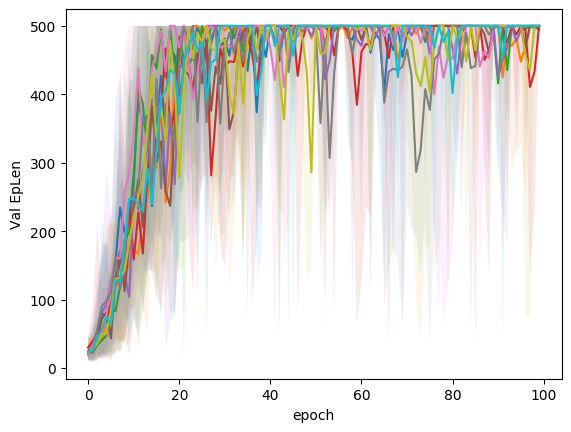

In [19]:
for df in dfs:
    plt.plot(df['AverageVal_EpLen'])
    plt.fill_between(df['Epoch'], df['MinVal_EpLen'], df['MaxVal_EpLen'], alpha=0.1)
plt.xlabel('epoch')
plt.ylabel('Val EpLen')
plt.show()

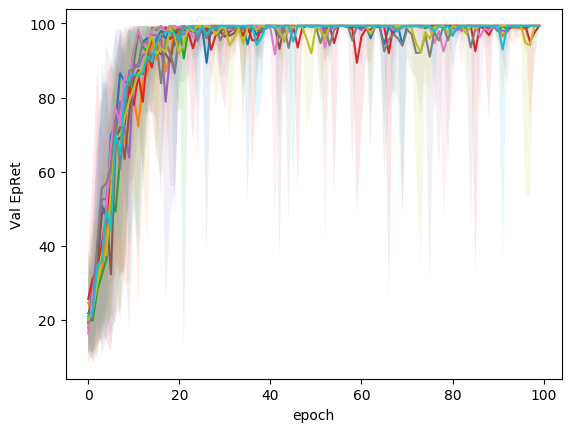

In [20]:
for df in dfs:
    plt.plot(df['AverageVal_EpRet'])
    plt.fill_between(df['Epoch'], df['MinVal_EpRet'], df['MaxVal_EpRet'], alpha=0.1)
plt.xlabel('epoch')
plt.ylabel('Val EpRet')
plt.show()

### Averaged

In [21]:
df_ = pd.concat(dfs).groupby('Epoch').mean().reset_index()

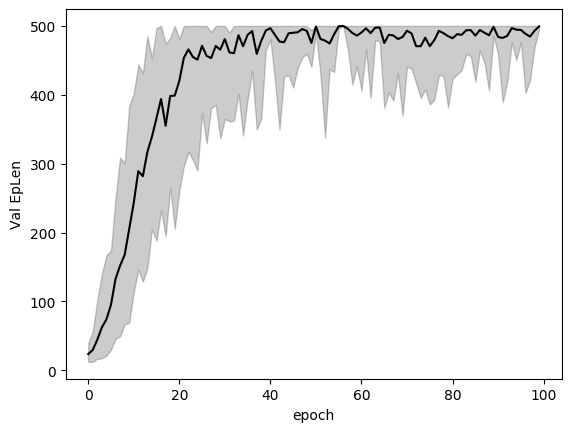

In [22]:
plt.plot(df_['AverageVal_EpLen'], color='k')
plt.fill_between(df_['Epoch'], df_['MinVal_EpLen'], df_['MaxVal_EpLen'], alpha=0.2, color='k')
plt.xlabel('epoch')
plt.ylabel('Val EpLen')
plt.show()

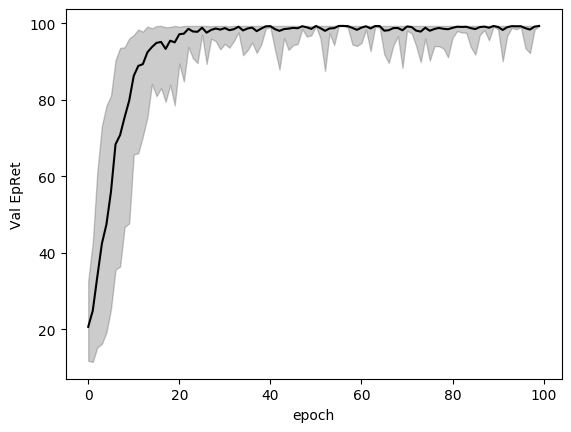

Bad pipe message: %s [b'.y!\xfe\xfa\xec\x1bj\xe1~\x9d\x9a\x92\x81\xb2\x00&\xc9 \xf3%P>\xd8{s\xdf07\x19\xf8OTe\xc80I9p_\x801\x8e\x07w\xbc"\x86\xf8vn\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t1']
Bad pipe message: %s [b'.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04', b'\x03\x06', b'\x07\x08']
Bad pipe message: %s [b'\t\x08\n\x08\x0b\x08\x04']
Bad pipe message: %s [b"\x04FRb\xf3K~X2}\xbf~ \x9eB)\x14\xad\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\

In [23]:
plt.plot(df_['AverageVal_EpRet'], color='k')
plt.fill_between(df_['Epoch'], df_['MinVal_EpRet'], df_['MaxVal_EpRet'], alpha=0.2, color='k')
plt.xlabel('epoch')
plt.ylabel('Val EpRet')
plt.show()